In [1]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [11]:
# metapeak vs number of peaks
df = pd.read_csv("../data/PeakFiles/FlyMetaPeaksPrimaryTargets.tsv", sep="\t")
meta2npeak = df.set_index("metaPeak")["numPeaks"].to_dict()

In [12]:
# metapeak vs TF of the peaks
df = pd.read_csv("../data/PeakFiles/FlyTFPeaksPrimaryTargets.tsv", sep="\t")
df['TF'] = df['experiment'].str.split("_", expand=True)[0]
meta2TF = df.groupby('metaPeak')['TF'].apply(set).to_dict()

In [13]:
# metapeak vs intersecting motifs
lines = []
with open("../result/peak_vs_motif/FlyTFPeaksPrimaryTargets_motif.txt", "r") as ff:
    for line in ff:
        lines.append(line.rstrip())
df = df.loc[:, ["metaPeak", "TF"]].copy()
df['motif'] = lines
df['motif'] = df['motif'].replace("", None)

meta2motif = {}
for name, meta_df in df.groupby("metaPeak"):
    meta_motif = list(meta_df["motif"].dropna())
    if len(meta_motif) != 0:
        motif_str = ",".join(meta_motif)
        meta2motif[name] = set(motif_str.split(","))
    else:
        meta2motif[name] = set([])

In [14]:
meta = pd.DataFrame(df['metaPeak'].unique())
meta[1] = meta[0].map(meta2npeak)
meta[2] = meta[0].map(meta2TF)
meta[3] = meta[0].map(meta2motif)
meta[4] = meta.apply(lambda row: row[2].intersection(row[3]), axis=1)
meta.columns = ["meta_name", "nPeak", "TF", "motif", "overlap"]

In [15]:
meta['len_motif'] = meta['motif'].apply(len)
spearmanr(meta['nPeak'], meta['len_motif'])

SignificanceResult(statistic=0.8258750511005281, pvalue=0.0)

### plot - worm

In [15]:
meta['nPeak'].max()

802

In [16]:
meta['nPeak_bin'] = pd.cut(meta['nPeak'], [0,50,100,200,300,400,500,600,1001])

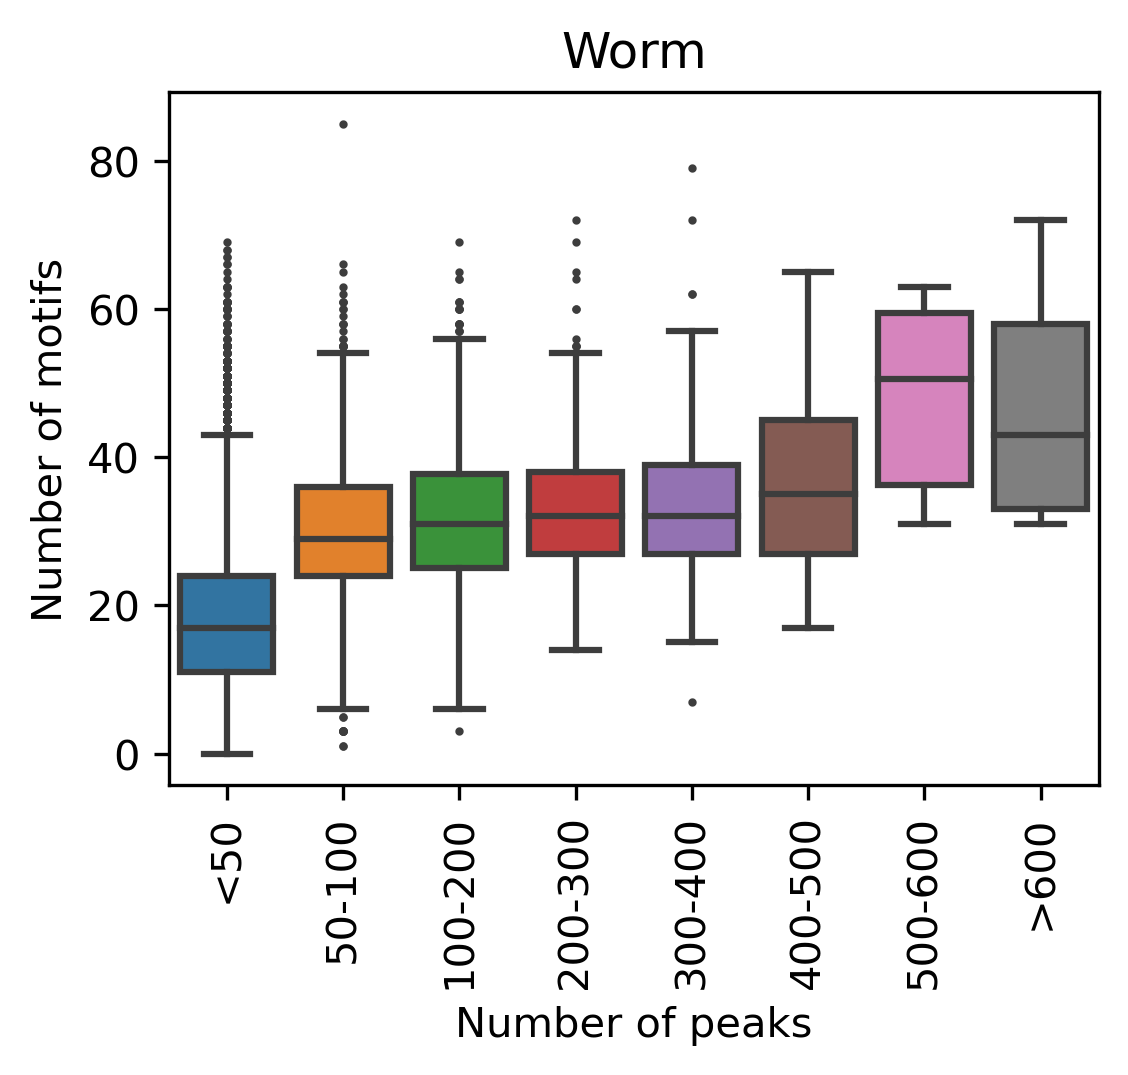

In [17]:
plt.figure(dpi=300, figsize=(4,3))
flierprops = dict(marker='.', markersize=2)
sns.boxplot(data=meta, x='nPeak_bin', y="len_motif", flierprops=flierprops)
plt.xticks([0,1,2,3,4,5,6,7], labels=["<50", "50-100", "100-200", "200-300", "300-400", "400-500", "500-600", ">600"], rotation=90)
plt.title("Worm")
plt.ylabel("Number of motifs")
plt.xlabel("Number of peaks")
plt.savefig("./figure_B_Worm.pdf", bbox_inches='tight', dpi=300)

### plot - fly

In [7]:
meta['nPeak'].max()

1000

In [8]:
meta['nPeak_bin'] = pd.cut(meta['nPeak'], [0,50,100,200,300,400,500,600,700,800,900,1001])

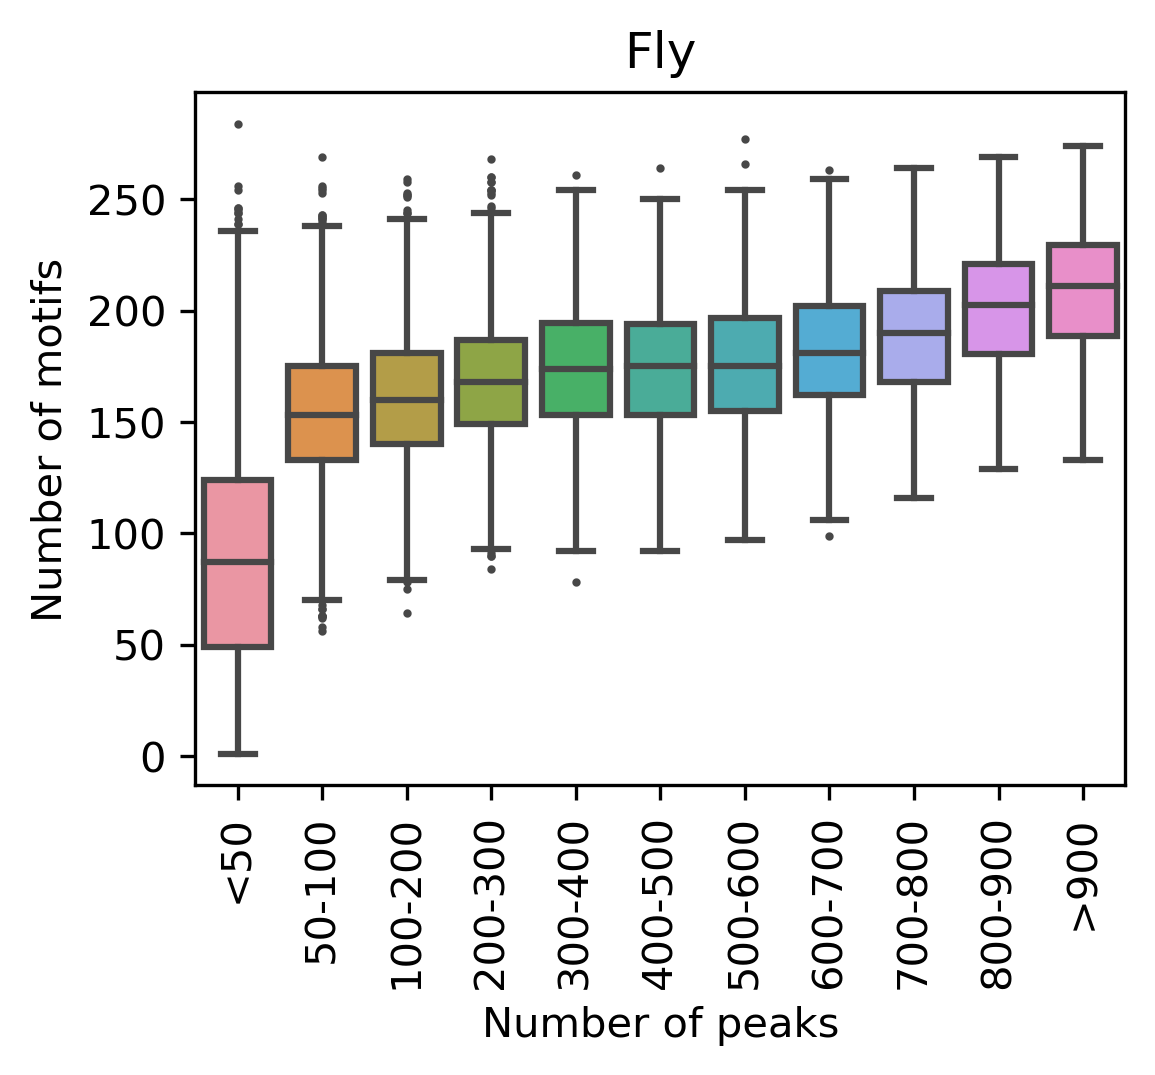

In [9]:
plt.figure(dpi=300, figsize=(4,3))
flierprops = dict(marker='.', markersize=2)
sns.boxplot(data=meta, x='nPeak_bin', y="len_motif", flierprops=flierprops)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], labels=["<50", "50-100","100-200", "200-300", "300-400", "400-500", "500-600", "600-700", "700-800", "800-900", ">900"], rotation=90)
plt.title("Fly")
plt.ylabel("Number of motifs")
plt.xlabel("Number of peaks")
plt.savefig("./figure_A_Fly.pdf", bbox_inches='tight', dpi=300)